# Quickstart: Survey

learn how to generate a survey

In [3]:
from skysurvey import survey

In [2]:
survey.Survey.from_pointings()

In [ ]:
skysurvey.

let's start with two predefined survey. A generic HealpixSurvey (based on healpix sky segmentation) 
and a real one ZTF (based on polygon sky segmentation)

### Healpix Survey

In [2]:
hpsurvey = survey.HealpixSurvey(9)

Let's draw the equivalent of 4 years of observations assuming 1000 healpix pixel pointings per day

Remark that, as such mjd_range and size are drawn independenly so, 1000 pointing per day is an average. 

In [3]:
%%time
hpsurvey.draw_random(size=365*4*1000, # number of observation 
                     bands=["ztf:g","ztf:r","ztf:i"], # band to observed
                     mjd_range=[56000, 56000+365*4], # timerange of observation
                     skynoise_range=[180,210], # sky noise
                     ra_range=[-30,90], 
                    inplace=True)  # set the self.data and do not return a new HealpixSurvey

CPU times: user 1.42 s, sys: 121 ms, total: 1.55 s
Wall time: 1.54 s


Remark: you could have load it directly this way using the ``from_random`` classmethod

In [4]:
%%time
hpsurvey = survey.HealpixSurvey.from_random(nside=9, 
                                     size=365*4*1000, # number of observation 
                                     bands=["ztf:g","ztf:r","ztf:i"],
                                     mjd_range=[56000, 56000+365*4], 
                                     skynoise_range=[180,210], 
                                     ra_range=[-30,90])

CPU times: user 1.59 s, sys: 67.3 ms, total: 1.66 s
Wall time: 1.66 s


In [5]:
hpsurvey.data # Show the data generated. time, band sky noise, gain, zp and fieldid.

,index,mjd,band,skynoise,gain,zp,fieldid
0,1062044,56000.002973,ztf:g,189.257440,1.0,25.0,242
1,1249528,56000.004859,ztf:r,187.777859,1.0,25.0,215
2,192202,56000.006378,ztf:r,194.216781,1.0,25.0,283
3,409009,56000.006559,ztf:r,180.293897,1.0,25.0,679
4,444654,56000.007560,ztf:g,183.365560,1.0,25.0,368
...,...,...,...,...,...,...,...
1459995,731093,57459.996615,ztf:g,204.285205,1.0,25.0,480
1459996,382315,57459.996719,ztf:g,198.106796,1.0,25.0,414
1459997,84354,57459.997449,ztf:g,205.018005,1.0,25.0,213
1459998,452268,57459.999544,ztf:g,192.236900,1.0,25.0,577


Let's get the number of time a 'field' has been observed

In [6]:
hpsurvey.get_fieldstat("size") 

537    2169
640    2162
69     2154
467    2143
600    2143
       ... 
625    1907
49     1904
302    1901
528    1889
136    1888
Name: fieldid, Length: 720, dtype: int64

These are just short cut to pandas dataframe contained in self.data

So you can play.

Let's measure the number of observation we have per day and per band

In [7]:
data = hpsurvey.data.copy()
data["day"] = data["mjd"].astype(int)

In [8]:
dailybands = data.groupby(["day","band"]).size()
dailybands

day    band 
56000  ztf:g    331
       ztf:i    352
       ztf:r    354
56001  ztf:g    312
       ztf:i    323
               ... 
57458  ztf:i    315
       ztf:r    313
57459  ztf:g    340
       ztf:i    315
       ztf:r    332
Length: 4380, dtype: int64

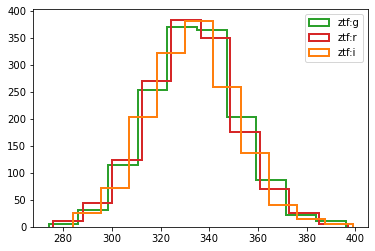

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()

prop = dict(lw=2, histtype="step")
ax.hist(dailybands.xs("ztf:g", level=1), color="tab:green", label="ztf:g", **prop) 
ax.hist(dailybands.xs("ztf:r", level=1), color="tab:red", label="ztf:r",**prop)
ax.hist(dailybands.xs("ztf:i", level=1), color="tab:orange", label="ztf:i",**prop)
ax.legend(loc='best')

#### Get the field of a target

This is an important feature that enable us to know whic field contains which target

In [10]:
hpsurvey.radec_to_fieldid(40, 90)

189

In [11]:
import numpy as np
# remark that, doing that this way, it won't be homogeneous.
ra_flat = np.random.uniform(-30, 90, 1000)
dec_flat = np.random.uniform(0, 360, 1000)
hpsurvey.radec_to_fieldid(ra_flat, dec_flat)

array([680,  25, 308,  55, 309, 387, 541, 476, 250, 618,  75, 628,  33,
       375, 216, 627, 654,  29,  99,  33,   3, 138,   0, 217, 268,  37,
       126, 670, 146, 293, 101, 616, 463, 544,  30, 106, 647,  21,  92,
        80, 103, 390, 687, 434, 404, 149, 231, 494, 466, 231,   5, 159,
       217, 110,   1, 225, 637, 711, 614, 535,  33, 416, 243,   3, 241,
       377, 458, 310, 614, 649, 295, 293,   4, 240,   1, 654,  60, 503,
       699, 181, 141,   1, 461, 132, 269,  69, 183, 677, 259, 456, 425,
       431,  91, 626, 716, 167, 517,  45, 506, 637,   3, 288, 403, 632,
       566, 688,   1, 120, 187,  24, 578, 157, 675, 276, 413,   2, 141,
       556, 327,   2,  23,  72, 100,   8, 138, 596, 507, 417,  21,   3,
         8,  44,  19, 355, 228, 205, 595, 111,   2, 342, 624, 271,  14,
         3, 293,   7, 183, 548, 374, 204,  58, 499, 460, 710,  16, 718,
       269,  22, 614,   3, 345, 679, 136, 644, 550, 266,  32, 121, 168,
       719, 434, 233,  31,  11,  68, 710,  60, 375,  38, 409,   

### ZTF, a polygon survey

polygon survey are surveys which pointings are defined by a (potentially very long) list of fieldid. (see self.

In [12]:
from skysurvey.survey import ZTF

random is using the real ZTF field definition, but enables you to generate a random draw (unrealistic) as for HealpixSurvey

In [13]:
%%time
ztf = ZTF.from_random(size=365*4*1000, # number of observation 
                     bands=["ztf:g","ztf:r","ztf:i"], # band to observed
                     mjd_range=[56000, 56000+365*4], # timerange of observation
                     skynoise_range=[180,210], # sky noise
                     )

CPU times: user 1.52 s, sys: 64.7 ms, total: 1.58 s
Wall time: 1.57 s


In [17]:
ztf.from_pointings()

,index,mjd,band,skynoise,gain,zp,fieldid
0,1098864,56000.000380,ztf:g,191.761084,1.0,25.0,640
1,1223485,56000.000577,ztf:g,180.381587,1.0,25.0,841
2,984632,56000.001277,ztf:g,183.271707,1.0,25.0,1129
3,484114,56000.002227,ztf:i,193.069914,1.0,25.0,169
4,338914,56000.003160,ztf:i,204.469816,1.0,25.0,1626
...,...,...,...,...,...,...,...
1459995,29058,57459.993638,ztf:r,205.078516,1.0,25.0,841
1459996,328557,57459.993640,ztf:i,202.250947,1.0,25.0,1250
1459997,517684,57459.997047,ztf:r,193.512497,1.0,25.0,1717
1459998,644763,57459.997076,ztf:i,191.637132,1.0,25.0,1174


In [16]:
data = ztf.data
data

,index,mjd,band,skynoise,gain,zp,fieldid
0,1098864,56000.000380,ztf:g,191.761084,1.0,25.0,640
1,1223485,56000.000577,ztf:g,180.381587,1.0,25.0,841
2,984632,56000.001277,ztf:g,183.271707,1.0,25.0,1129
3,484114,56000.002227,ztf:i,193.069914,1.0,25.0,169
4,338914,56000.003160,ztf:i,204.469816,1.0,25.0,1626
...,...,...,...,...,...,...,...
1459995,29058,57459.993638,ztf:r,205.078516,1.0,25.0,841
1459996,328557,57459.993640,ztf:i,202.250947,1.0,25.0,1250
1459997,517684,57459.997047,ztf:r,193.512497,1.0,25.0,1717
1459998,644763,57459.997076,ztf:i,191.637132,1.0,25.0,1174


If you have a list of observation have these data. load directly a ztf instance with that

In [17]:
%%time
other_ztf = ZTF(data=data)

CPU times: user 39.4 ms, sys: 11.3 ms, total: 50.7 ms
Wall time: 45.2 ms


In [18]:
other_ztf.get_fieldstat("size")

249     924
669     913
1086    911
1820    909
827     908
       ... 
14      749
424     746
1515    740
420     737
552     727
Name: fieldid, Length: 1776, dtype: int64

**Next let's join targets and survey**